In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import dslabs_functions as dslab


In [2]:
df = pd.read_csv("../../../data/class_credit_score.csv")
df.shape

(100000, 28)

In [15]:
def handle_outliers(data: pd.DataFrame):
    data = data.copy(deep=True)
    numeric_vars = dslab.get_variable_types(data)["numeric"]
    summary = data[numeric_vars].describe()
    for var in numeric_vars:
        top, bottom = dslab.determine_outlier_thresholds_for_var(summary[var], std_based=False)

        data[var + "_drop"] = data[var]
        data[var + "_drop"] = data[var].apply(
            lambda x: np.NaN if x > top or x < bottom else x
        )

        median = data[var].median()
        data[var + "_median"] = data[var].apply(
            lambda x: median if x > top or x < bottom else x
        )

        data[var + "_truncated"] = data[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    return data


0it [00:00, ?it/s]

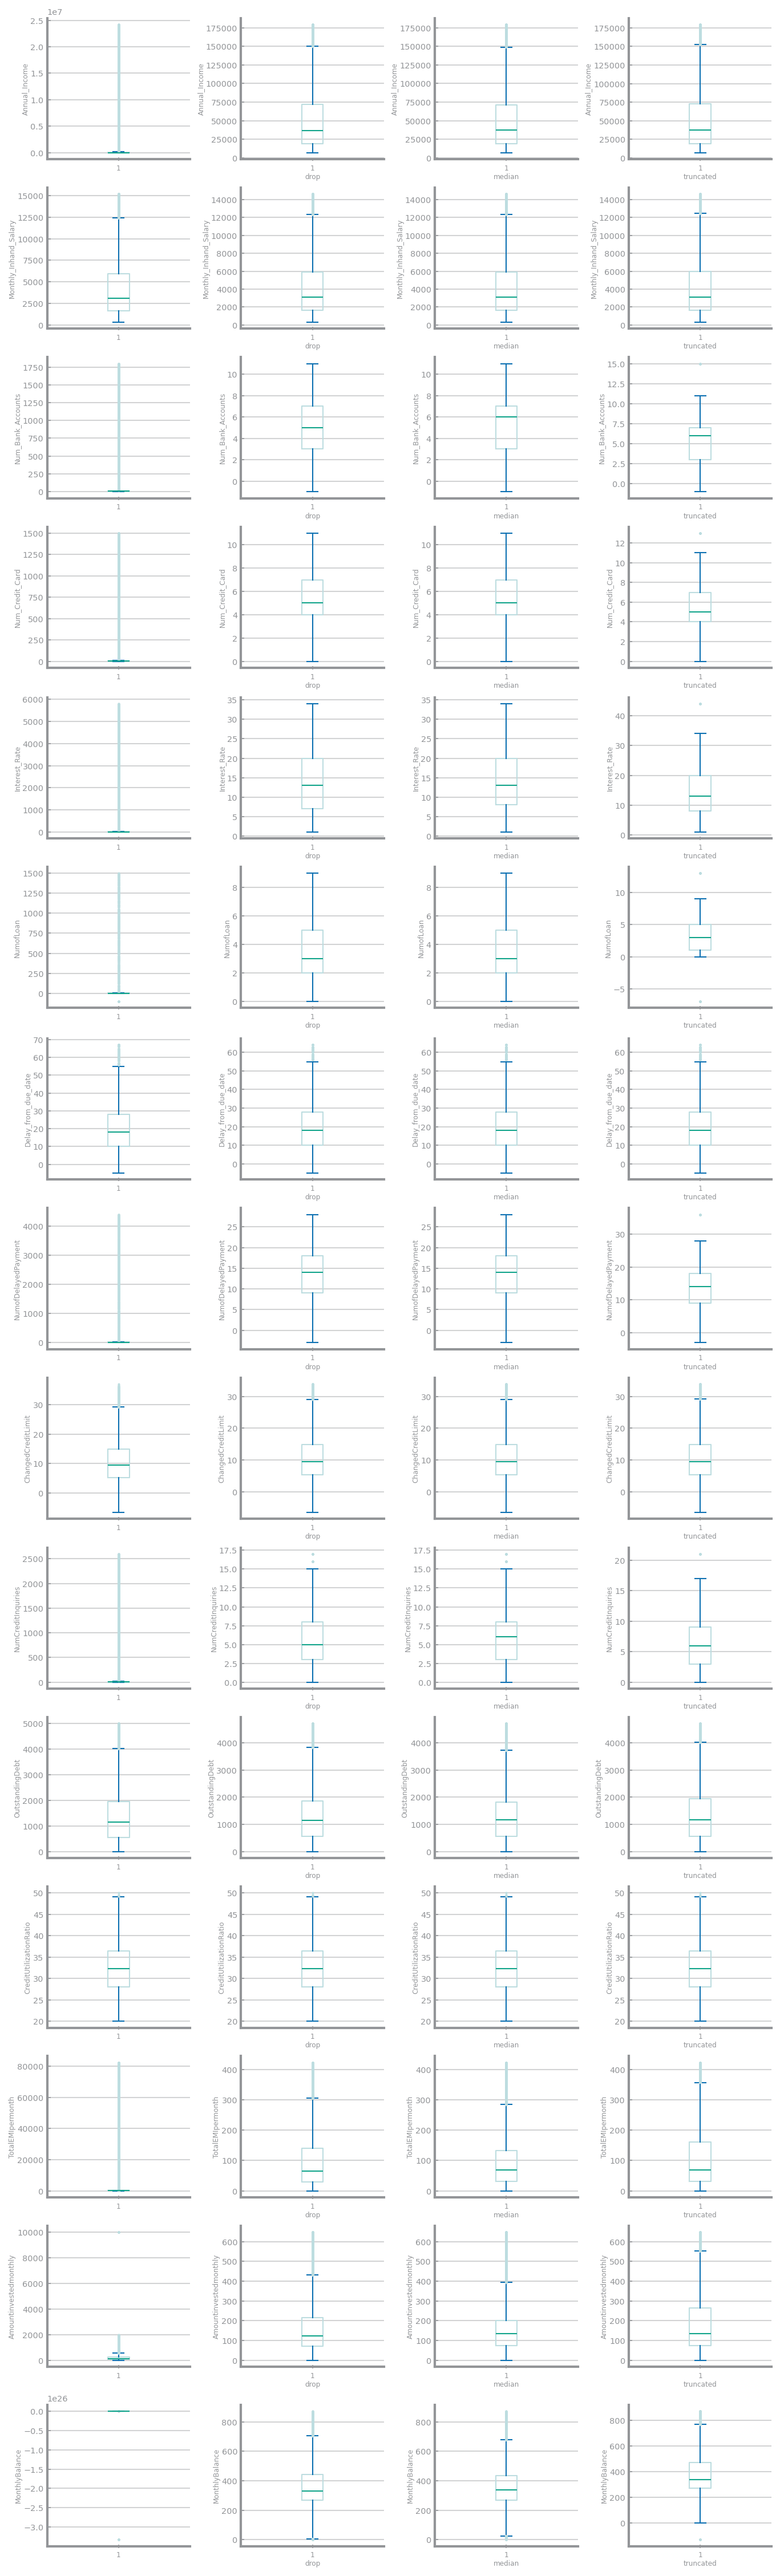

In [22]:
flierprops = dict(markersize=1)
numeric_vars = dslab.get_variable_types(df)["numeric"]
df_with_outliers = handle_outliers(df)
fig, axs = plt.subplots(ncols=4, nrows=len(numeric_vars), figsize=(9, 2 * len(numeric_vars)), constrained_layout=True)
for i, var in tqdm(enumerate(numeric_vars)):
    var_data = df_with_outliers[var]
    var_data = var_data[~np.isnan(var_data)]
    axs[i, 0].boxplot(var_data, flierprops=flierprops)
    axs[i, 0].set_ylabel(var)
    for j, approach in enumerate(["drop", "median", "truncated"]):
        var_data = df_with_outliers[var + "_" + approach]
        var_data = var_data[~np.isnan(var_data)]
        axs[i, j + 1].boxplot(var_data, flierprops=flierprops)
        axs[i, j + 1].set_ylabel(var)
        axs[i, j + 1].set_xlabel(f"{approach}")

plt.savefig(f"images/service_outlier_removal.png", bbox_inches='tight')